Notes
drop frame 14 in numpy- gel out of image, bad for segmentation, drop 45,47 jump in illumination in channel 2




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import tifffile
import seaborn as sns2
from IPython.display import HTML
import matplotlib.animation as animation
from tqdm.notebook import tqdm, trange
from preprocessing import preprocessing_v2 as pp
from utils import analysis_utils as au
import importlib
plt.rcParams['font.size'] = '20'
from utils import graph_utils as gu
import shutil
from sklearn.linear_model import LinearRegression
from scipy.spatial.transform import Rotation as R
import scipy.ndimage
from utils import analysis_utils as au


## PATHS and CONSTANTS



In [3]:
PROJECT_PATH = 'C:/Users/amityu/DataspellProjects/gel_sheets/'
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
#DATA_PATH = r'D:\amityu\backoffice_data\\'
movie = '030724'
ADD_PATH = os.path.join(PROJECT_PATH, "add_data/", movie + "/")
MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'

In [23]:
execute = False
if execute:
    pp.save_exp_data(MOVIE_PATH, "Cca120 am200", 0.175,0.175, 0.250, spike_in=-1, spike_out=-1)


In [24]:
# No need to copy files
copy_flag  = False
if copy_flag:
    source_dir = os.path.join(MOVIE_PATH, '1-Tiff')
    files = os.listdir(source_dir)
    for file in tqdm(files):
        if file.endswith('C1.tif'):
            shutil.copyfile(os.path.join(source_dir,file), os.path.join(MOVIE_PATH, 'tiff/C1/', file))
        elif file.endswith('C2.tif'):
            shutil.copyfile(os.path.join(source_dir,file), os.path.join(MOVIE_PATH, 'tiff/C2/', file))

  0%|          | 0/96 [00:00<?, ?it/s]

## <span color=red >Load Images

</span>


In [57]:
file_list = pp.get_file_list(MOVIE_PATH + 'tiff/C1/')

1 other location check_T1_C1.tif
2 Capture 9_T2_C1.tif
3 Capture 10_T3_C1.tif
4 Capture 10_T4_C1.tif
5 Capture 10_T5_C1.tif
6 Capture 10_T6_C1.tif
7 Capture 10_T7_C1.tif
8 Capture 10_T8_C1.tif
9 Capture 11_T9_C1.tif
10 Capture 11_T10_C1.tif
11 Capture 11_T11_C1.tif
12 Capture 11_T12_C1.tif
13 Capture 11_T13_C1.tif
14 Capture 11_T14_C1.tif
15 Capture 12_T15_C1.tif
16 Capture 13_T16_C1.tif
17 Capture 14_T17_C1.tif
18 Capture 15_T18_C1.tif
19 Capture 16_T19_C1.tif
20 Capture 17_T20_C1.tif
21 Capture 17_T21_C1.tif
22 Capture 17_T22_C1.tif
23 Capture 18_T23_C1.tif
24 Capture 18_T24_C1.tif
25 Capture 18_T25_C1.tif
26 Capture 18_T26_C1.tif
27 Capture 18_T27_C1.tif
28 Capture 18_T28_C1.tif
29 Capture 18_T29_C1.tif
30 Capture 18_T30_C1.tif
31 Capture 19_T31_C1.tif
32 Capture 19_T32_C1.tif
33 Capture 19_T33_C1.tif
34 Capture 19_T34_C1.tif
35 Capture 19_T35_C1.tif
36 Capture 19_T36_C1.tif
37 Capture 19_T37_C1.tif
38 Capture 19_T38_C1.tif
39 Capture 20_T39_C1.tif
40 Capture 21_T40_C1.tif
41 Captur

In [58]:
#load images
gel_list = []
for i in range(len(file_list)):
    gel_list.append(tifffile.imread(MOVIE_PATH + 'tiff/C1/' + file_list[i]))
    print(i, end = ',')

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,

In [59]:
# get the max z since images where taken with different
max_z = pp.get_max_z(gel_list)


0 : (65, 512, 512)
1 : (93, 512, 512)
2 : (93, 512, 512)
3 : (93, 512, 512)
4 : (93, 512, 512)
5 : (93, 512, 512)
6 : (93, 512, 512)
7 : (93, 512, 512)
8 : (93, 512, 512)
9 : (93, 512, 512)
10 : (93, 512, 512)
11 : (93, 512, 512)
12 : (93, 512, 512)
13 : (93, 512, 512)
14 : (93, 512, 512)
15 : (93, 512, 512)
16 : (93, 512, 512)
17 : (93, 512, 512)
18 : (93, 512, 512)
19 : (93, 512, 512)
20 : (93, 512, 512)
21 : (93, 512, 512)
22 : (93, 512, 512)
23 : (93, 512, 512)
24 : (93, 512, 512)
25 : (93, 512, 512)
26 : (93, 512, 512)
27 : (93, 512, 512)
28 : (93, 512, 512)
29 : (93, 512, 512)
30 : (93, 512, 512)
31 : (93, 512, 512)
32 : (93, 512, 512)
33 : (93, 512, 512)
34 : (93, 512, 512)
35 : (93, 512, 512)
36 : (93, 512, 512)
37 : (93, 512, 512)
38 : (93, 512, 512)
39 : (93, 512, 512)
40 : (93, 512, 512)
41 : (93, 512, 512)
42 : (93, 512, 512)
43 : (93, 512, 512)
44 : (93, 512, 512)
45 : (93, 512, 512)
46 : (93, 512, 512)
47 : (93, 512, 512)
max_z_value 93


In [109]:
#set blank areas to nan

gel = pp.make_numpy_from_list(gel_list, max_z)

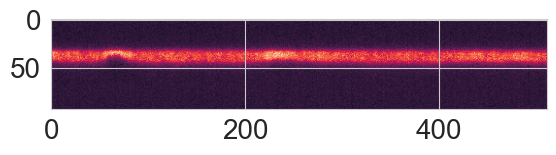

In [110]:
plt.imshow(gel[10,:,:,256])
plt.show()

In [111]:

#Remove bad frames
mask = np.ones(len(gel), dtype=bool)
mask[[14,45,47]] = False

In [112]:
np.save(MOVIE_PATH + 'tmp/gel.npy',gel[mask])


In [113]:
del gel

## view gel on napari

In [114]:
gel = np.load(MOVIE_PATH + 'tmp/gel.npy')#, mmap_mode='r')

In [115]:
gel.shape

(45, 93, 512, 512)

In [116]:
# plot histogram

In [117]:
raw_data =gel[~np.isnan(gel)]  #

In [118]:
hist, bin_edges = au.histogram_cupy(raw_data, bins=np.linspace(0,350,50))

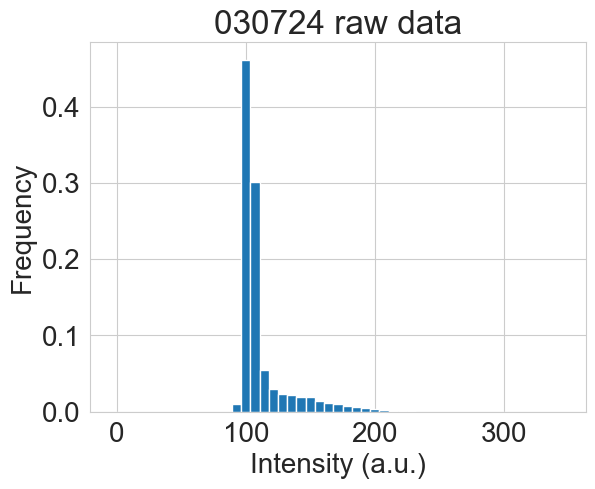

In [119]:
plt.bar(bin_edges[:-1],hist, width =bin_edges[1]- bin_edges[0])
plt.title('{} raw data'.format(movie))
image_name = 'raw_data'
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Frequency')
plt.savefig(DATA_PATH + '{}/tmp/{}.png'.format(movie,image_name))
plt.show()

In [120]:
del raw_data

## <span color=red> Illumination filter

In [121]:
illumination_sigma = 25

In [122]:
# back ground should be few pixels far from the membrane
min_z_filter = 0
max_z_filter = 7

In [123]:
time_points = range(1,len(gel),1)
filters = []
for i,t in tqdm(enumerate(time_points)):
   
    filters.append(pp.get_illumination_filter(gel[t],min_z_filter,max_z_filter,illumination_sigma))

0it [00:00, ?it/s]

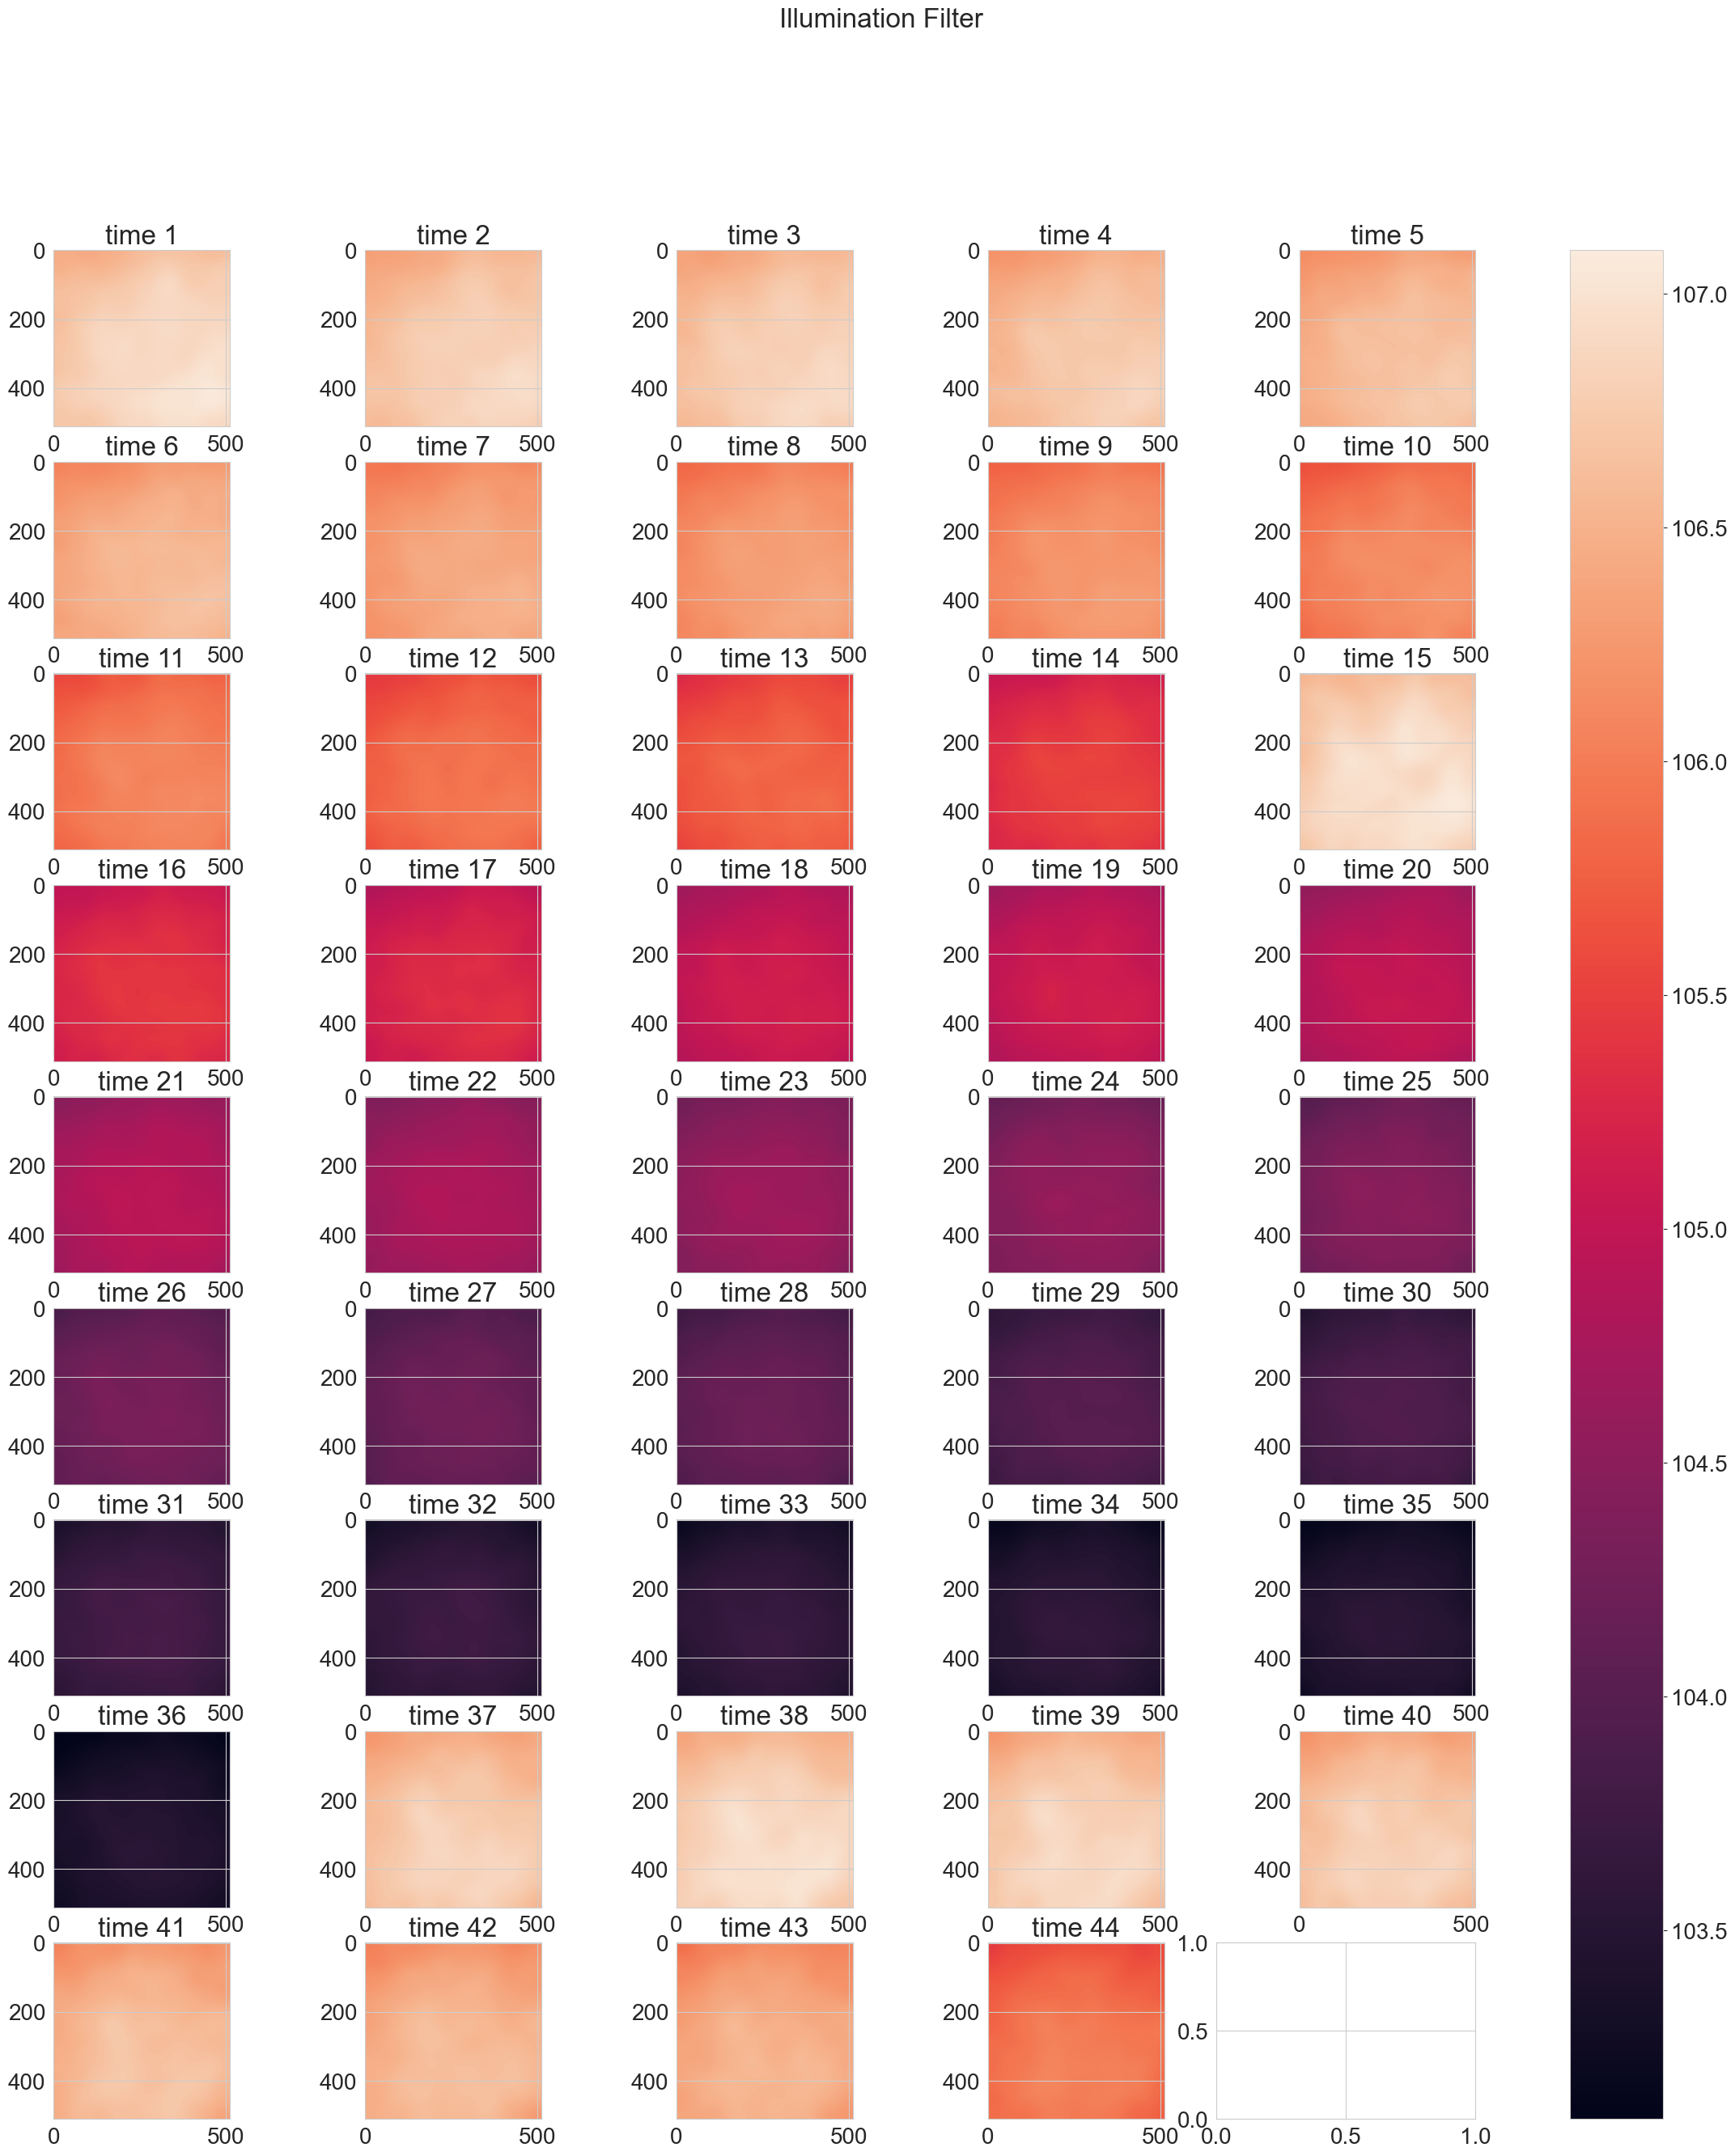

In [124]:
gu.show_imshow_sequence_with_colorbar(filters,time_points, 'Illumination Filter')



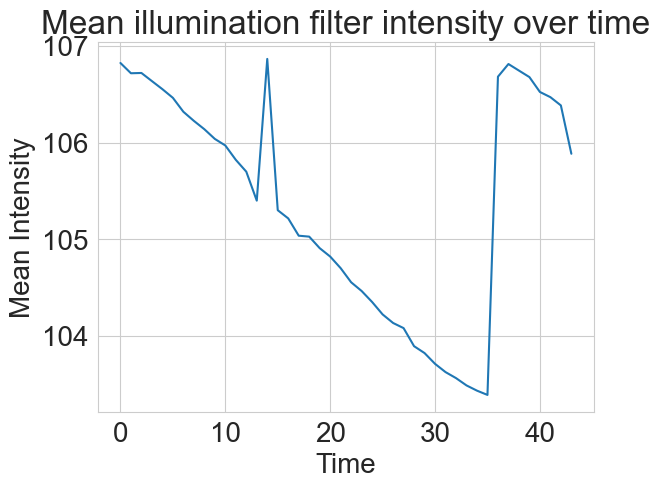

In [125]:
mean_illumination = np.mean(filters, axis = (1,2))
plt.plot(mean_illumination)
plt.title('Mean illumination filter intensity over time')
plt.xlabel('Time')
plt.ylabel('Mean Intensity')
plt.show()
# graph shows jumps in intensity mean of 3%, I accepted this

In [126]:


gel_corrected = pp.apply_illumination_filter(gel, min_z_filter, max_z_filter, illumination_sigma)
  

  0%|          | 0/45 [00:00<?, ?it/s]

In [127]:
del gel_list, gel  

In [128]:
data_after_illumination = gel_corrected[~np.isnan(gel_corrected)] 

In [129]:

hist, bins_edges = au.histogram_cupy(data_after_illumination, bins = np.linspace(0.8, 1.8, 51) )

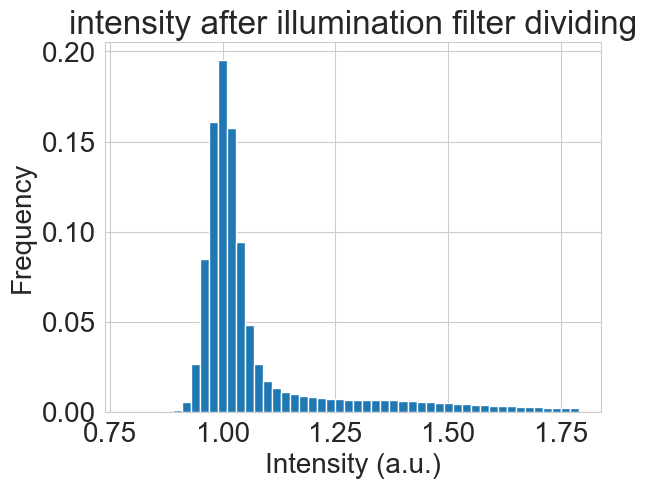

In [130]:
plt.bar(bins_edges[:-1], hist, width=bins_edges[1]- bins_edges[0])
plt.title('intensity after illumination filter dividing')
image_name = 'after_illumination_filter'
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Frequency')
plt.show()

In [131]:
np.save(MOVIE_PATH + 'tmp/gel_corrected.npy', gel_corrected)

In [132]:
del data_after_illumination

In [133]:
del gel_corrected

### take monomer intensity with gui and save as monomer_rect.csv

In [134]:
gel_corrected = np.load(MOVIE_PATH + 'tmp/gel_corrected.npy')

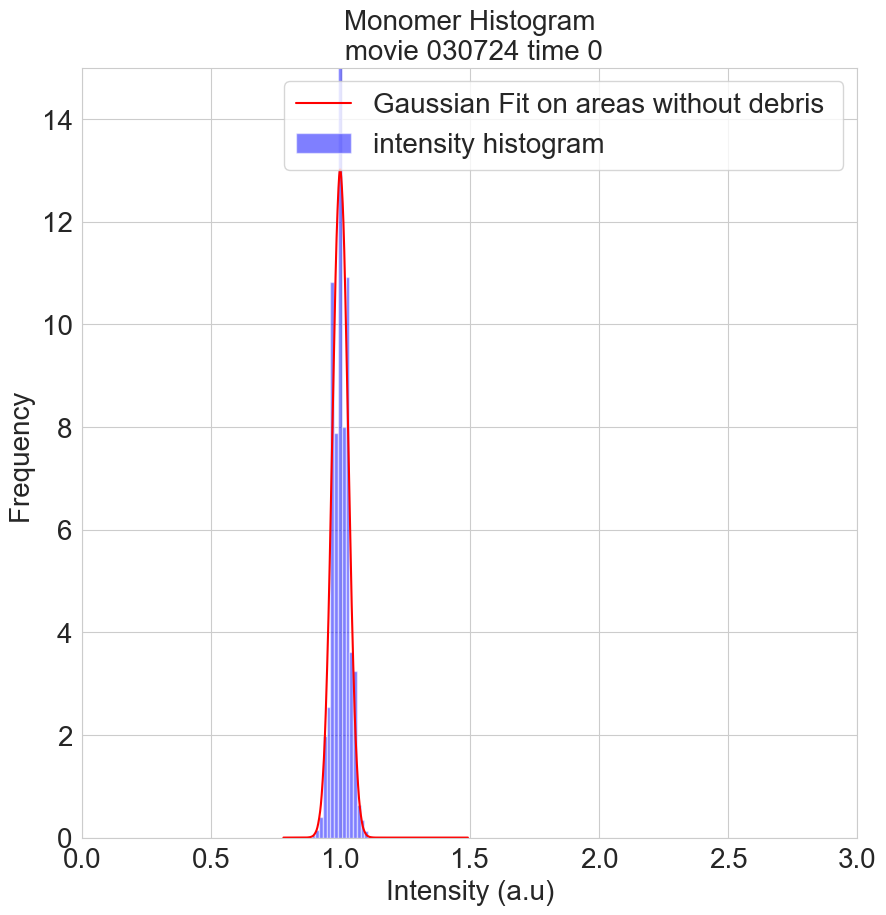

In [137]:
# save animation of fitting the curve
monomer_data_df = pd.read_csv(MOVIE_PATH + 'np/monomer_rect.csv')

pp.monomer_fit_animation(movie,gel_corrected, monomer_data_df, GRAPH_PATH + 'tmp')

In [138]:
monomer_data_df = pd.read_csv(MOVIE_PATH + 'np/monomer_rect.csv')
monomer_data_df = pp.fit_monomer(gel_corrected, monomer_data_df)
monomer_data_df.to_csv(MOVIE_PATH + 'np/monomer_rectv2.csv')
# check rectv2 and rename it and to monomer_rect.csv and copy to add data folder under the movie directory

  0%|          | 0/45 [00:00<?, ?it/s]

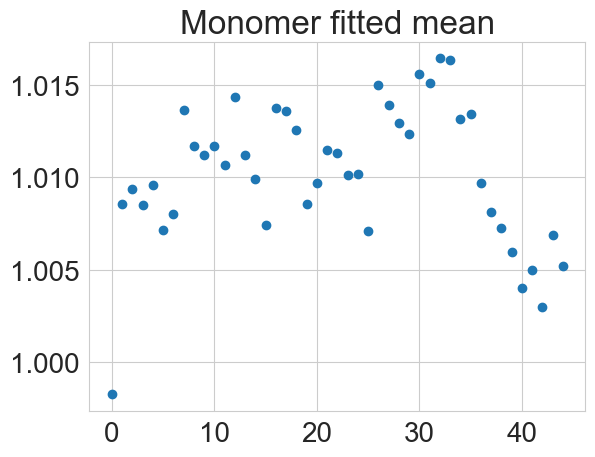

In [139]:
plt.scatter(range(len(monomer_data_df)), monomer_data_df['gaussian_mean'])
plt.title('Monomer fitted mean')
plt.show()

### add monomer to add path as monomer_rect.csv

In [141]:
gel_minus_monomer = gel_corrected.copy()
gel_minus_monomer[gel_minus_monomer==0]=np.nan
monomer = pd.read_csv(ADD_PATH + 'monomer_rect.csv')
mean_monomer = monomer['gaussian_mean'].to_numpy()
for t in trange(len(gel_minus_monomer)):
    gel_minus_monomer[t] -= mean_monomer[t]


  0%|          | 0/45 [00:00<?, ?it/s]

In [142]:
del gel_corrected

In [143]:
data = gel_minus_monomer[~np.isnan(gel_minus_monomer)]

In [144]:

hist, bins_edges = au.histogram_cupy(data, bins=np.linspace(-0.2, 2, 51))

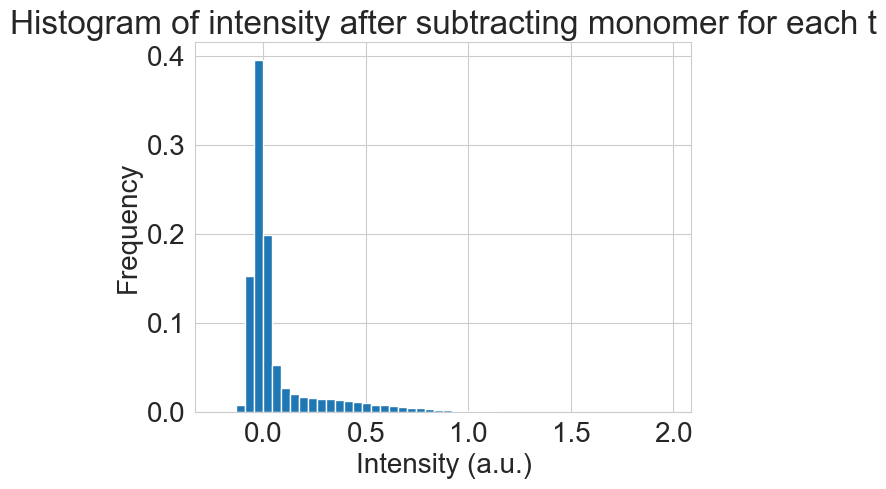

In [145]:
plt.bar(bins_edges[:-1], hist, width=bins_edges[1] - bins_edges[0])
plt.title('Histogram of intensity after subtracting monomer for each t')
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Frequency')

image_name = 'gel_div_filter_mono_reduced'
plt.show()

<span color = yellow> Background bellow membrane measuring


Text(0, 0.5, 'Intensity')

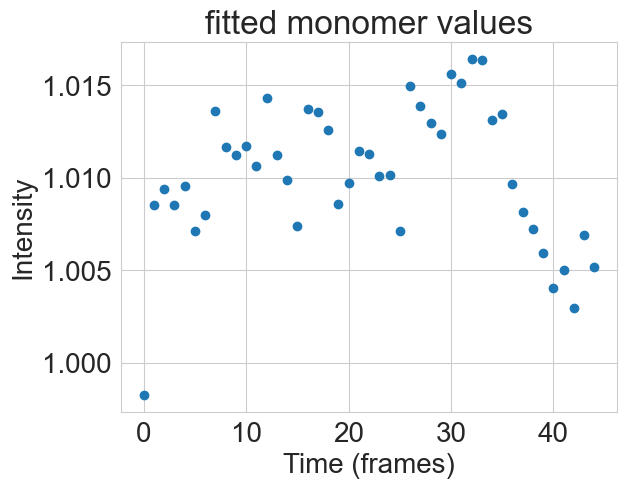

In [146]:
plt.rcParams.update({'font.size' :20})
plt.scatter(range(len(mean_monomer)),mean_monomer)
plt.title('fitted monomer values')
plt.xlabel('Time (frames)')
plt.ylabel('Intensity')


In [147]:
np.save(MOVIE_PATH + 'tmp/gel_norm_before_stabilize.npy', gel_minus_monomer)


In [148]:
del data

In [149]:
monomer_data_df = pd.read_csv(ADD_PATH + 'monomer_rect.csv')

In [150]:
gel = np.load(MOVIE_PATH + 'tmp/gel_norm_before_stabilize.npy', mmap_mode='r')
#gel = np.load(MOVIE_PATH + 'np/gel_norm.npy', mmap_mode='r')


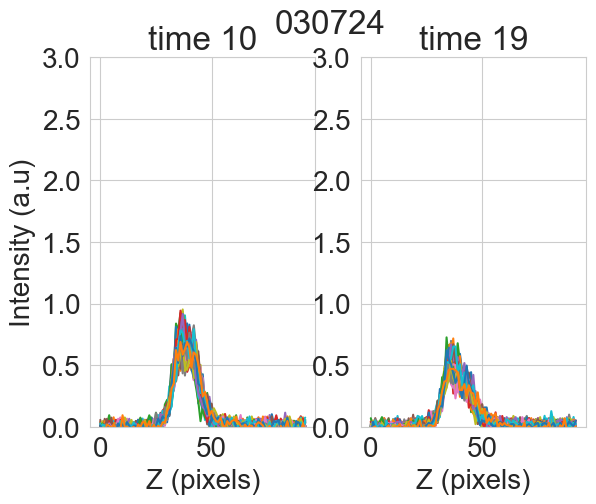

In [151]:
fig, (ax1, ax2) = plt.subplots(1,2)
t1 = 10
t2 = 19

y = 50
for x in range(0,gel.shape[3],10):
    ax1.plot(gel[t1,:,y,x])
    ax2.plot(gel[t2,:,y,x])
ax1.set_ylim(0,3)
ax2.set_ylim(0,3)
ax1.set_title('time {}'.format(t1))
ax2.set_title('time {}'.format(t2))
ax1.set_xlabel('Z (pixels)')
ax2.set_xlabel('Z (pixels)')

ax1.set_ylabel('Intensity (a.u)')
fig.suptitle(movie)

plt.show()

### <span color='red'> pay attention if monomer mean is reduced, you have to pass to get_surface number_of_mean = 0

In [152]:
# gel is very long and z axis relatively small. therefore I open memory map file that will add zeros above the gel. this will make 
#background area and make it the largest component when creating the mask in segmentation 
# Create a new memory-mapped array with the adjusted shape
data_shape = (gel.shape[0] , gel.shape[1]+40) + gel.shape[2:]
new_gel = np.memmap(MOVIE_PATH + 'tmp/new_data.mmap', dtype='float32', mode='w+', shape=data_shape)

# Copy data into the right positions
new_gel[:,: gel.shape[1], ...] = gel

# Flush changes to disk and close the files
new_gel.flush()

### <span color = 'yellow'> Important note, membrane and surface should also be transoformed

In [153]:
from skimage.filters import apply_hysteresis_threshold
from skimage import morphology
from skimage.morphology import ball
from scipy.ndimage import label
from preprocessing import preprocessing_v2 as pp
#gel = np.concatenate((gel, np.zeros((len(gel),15,gel.shape[2], gel.shape[3]))), axis =1)
for std in [4.5]:
    surface, membrane = pp.get_surface_and_membrane(new_gel, ADD_PATH, number_of_mean=0, number_of_std= std, selem_radius=3)
    surface[surface>=gel.shape[1]]= gel.shape[1]-1
    np.save(MOVIE_PATH + 'tmp/height%d_s3.npy'%(std*10), surface)
    np.save(MOVIE_PATH + 'tmp/membrane%d_s3.npy'%(std*10),membrane)
    

  0%|          | 0/45 [00:00<?, ?it/s]

In [154]:
del new_gel

## check segemntation in gui

In [155]:

membrane = np.load(MOVIE_PATH + 'tmp/membrane45_s3.npy')

In [156]:
#saving z values of the membrane height for later use while shifting channel2 and surface and height
z = np.nanmean(membrane, axis = (1,2))
df =  pd.DataFrame({'z' : z})
first = True
if first:
    df.to_csv(MOVIE_PATH + 'np/membrane_fit.csv')

In [7]:
z0 = 15

In [6]:
gel_minus_monomer = np.load(MOVIE_PATH + 'tmp/gel_norm_before_stabilize.npy', mmap_mode='r')

gel_norm_b = np.zeros(gel_minus_monomer.shape, dtype = np.float32)
#z = pd.read_csv(MOVIE_PATH + 'np/membrane_fit.csv')['z'].to_numpy()
for t in trange(len(gel_minus_monomer)):
    shift_val = [(z0-z[t]),0,0]

    # shift your array
    gel_norm_b[t] = scipy.ndimage.shift(gel_minus_monomer[t], shift_val, mode='constant', cval=np.nan, order=1)


  0%|          | 0/45 [00:00<?, ?it/s]

NameError: name 'z0' is not defined

C:\Users\amityu\AppData\Local\Temp\ipykernel_20220\584319858.py:2: RuntimeWarning:

All-NaN slice encountered



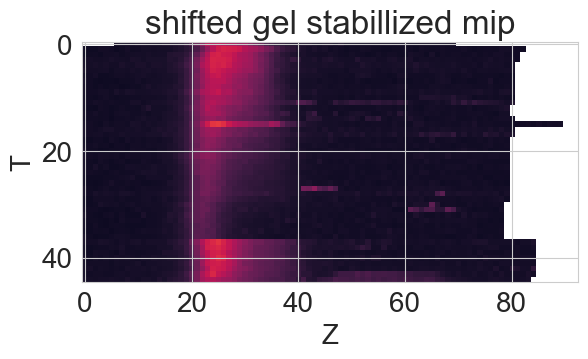

In [158]:
# please look that there is a straight line at the membrane level
mip = np.nanmax(gel_norm_b, axis=(2,3))
plt.imshow(mip, vmin =0 ,vmax =3)
plt.title('shifted gel stabillized mip')
plt.xlabel('Z')
plt.ylabel('T')
plt.show()

In [159]:
np.save(MOVIE_PATH + 'tmp/gel_norm_before_trim.npy', gel_norm_b)


In [160]:
del gel_minus_monomer, gel_norm_b

## <span color=red > Load Channel 2 images

In [161]:
file_list = pp.get_file_list(MOVIE_PATH + 'tiff/C2/')
#load images
c2_list = []
for i in range(len(file_list)):
    c2_list.append(tifffile.imread(MOVIE_PATH + 'tiff/C2/' + file_list[i]))
    
    print(i, end=',')
# get the max z since images where taken with different
max_z = pp.get_max_z(c2_list)

#set blank areas to nan

c2 = pp.make_numpy_from_list(c2_list, max_z)

1 other location check_T1_C2.tif
2 Capture 9_T2_C2.tif
3 Capture 10_T3_C2.tif
4 Capture 10_T4_C2.tif
5 Capture 10_T5_C2.tif
6 Capture 10_T6_C2.tif
7 Capture 10_T7_C2.tif
8 Capture 10_T8_C2.tif
9 Capture 11_T9_C2.tif
10 Capture 11_T10_C2.tif
11 Capture 11_T11_C2.tif
12 Capture 11_T12_C2.tif
13 Capture 11_T13_C2.tif
14 Capture 11_T14_C2.tif
15 Capture 12_T15_C2.tif
16 Capture 13_T16_C2.tif
17 Capture 14_T17_C2.tif
18 Capture 15_T18_C2.tif
19 Capture 16_T19_C2.tif
20 Capture 17_T20_C2.tif
21 Capture 17_T21_C2.tif
22 Capture 17_T22_C2.tif
23 Capture 18_T23_C2.tif
24 Capture 18_T24_C2.tif
25 Capture 18_T25_C2.tif
26 Capture 18_T26_C2.tif
27 Capture 18_T27_C2.tif
28 Capture 18_T28_C2.tif
29 Capture 18_T29_C2.tif
30 Capture 18_T30_C2.tif
31 Capture 19_T31_C2.tif
32 Capture 19_T32_C2.tif
33 Capture 19_T33_C2.tif
34 Capture 19_T34_C2.tif
35 Capture 19_T35_C2.tif
36 Capture 19_T36_C2.tif
37 Capture 19_T37_C2.tif
38 Capture 19_T38_C2.tif
39 Capture 20_T39_C2.tif
40 Capture 21_T40_C2.tif
41 Captur

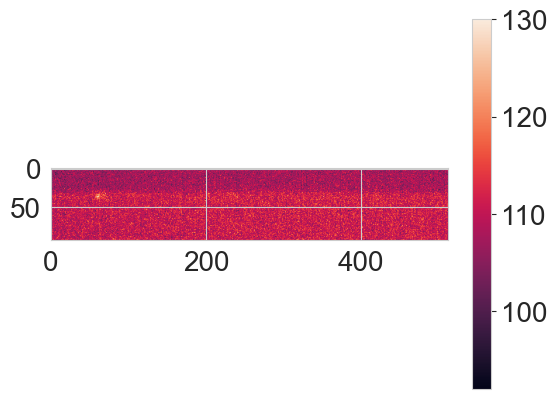

In [162]:
plt.imshow(c2[10,:,:,256])
plt.colorbar()
plt.show()

In [ ]:
#c2 = c2[7:27]

In [163]:
img_c2 = np.nanmean(c2, axis = (2,3))


C:\Users\amityu\AppData\Local\Temp\ipykernel_20220\2743648177.py:1: RuntimeWarning:

Mean of empty slice



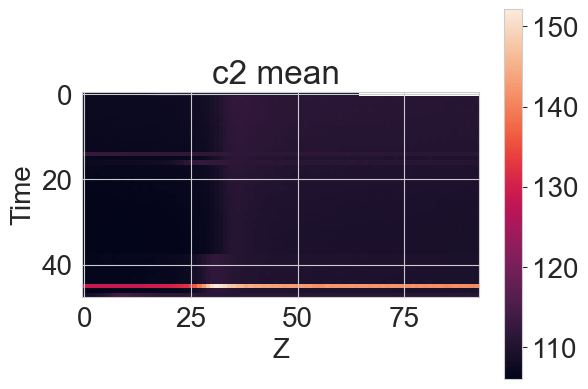

In [164]:
plt.imshow(img_c2)
plt.colorbar()
plt.title('c2 mean ')
plt.xlabel('Z')
plt.ylabel('Time')
plt.show()

In [166]:
# masked defined on c1
np.save(MOVIE_PATH + 'tmp/motors.npy',c2[mask])

In [194]:
c2 = np.load(MOVIE_PATH + 'tmp/motors.npy')

In [195]:
raw_data = c2[~np.isnan(c2)]  #

In [196]:
hist, bin_edges = au.histogram_cupy(raw_data, bins=np.linspace(80, 150, 50))

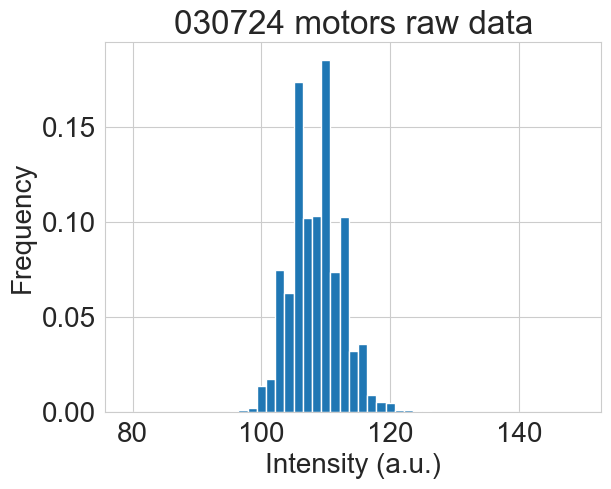

In [197]:

plt.bar(bin_edges[:-1], hist, width=bin_edges[1] - bin_edges[0])
plt.title('{} motors raw data'.format(movie))
image_name = 'Motors_data'
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Frequency')
plt.savefig(DATA_PATH + '{}/tmp/{}.png'.format(movie, image_name))
plt.show()

In [198]:
del raw_data

In [199]:
illumination_sigma = 25

In [200]:
filters = []

time_points = range(0,len(c2),1)
for i,t in tqdm(enumerate(time_points)):
   
    filters.append(pp.get_illumination_filter(c2[t],min_z_filter,max_z_filter,illumination_sigma))

0it [00:00, ?it/s]

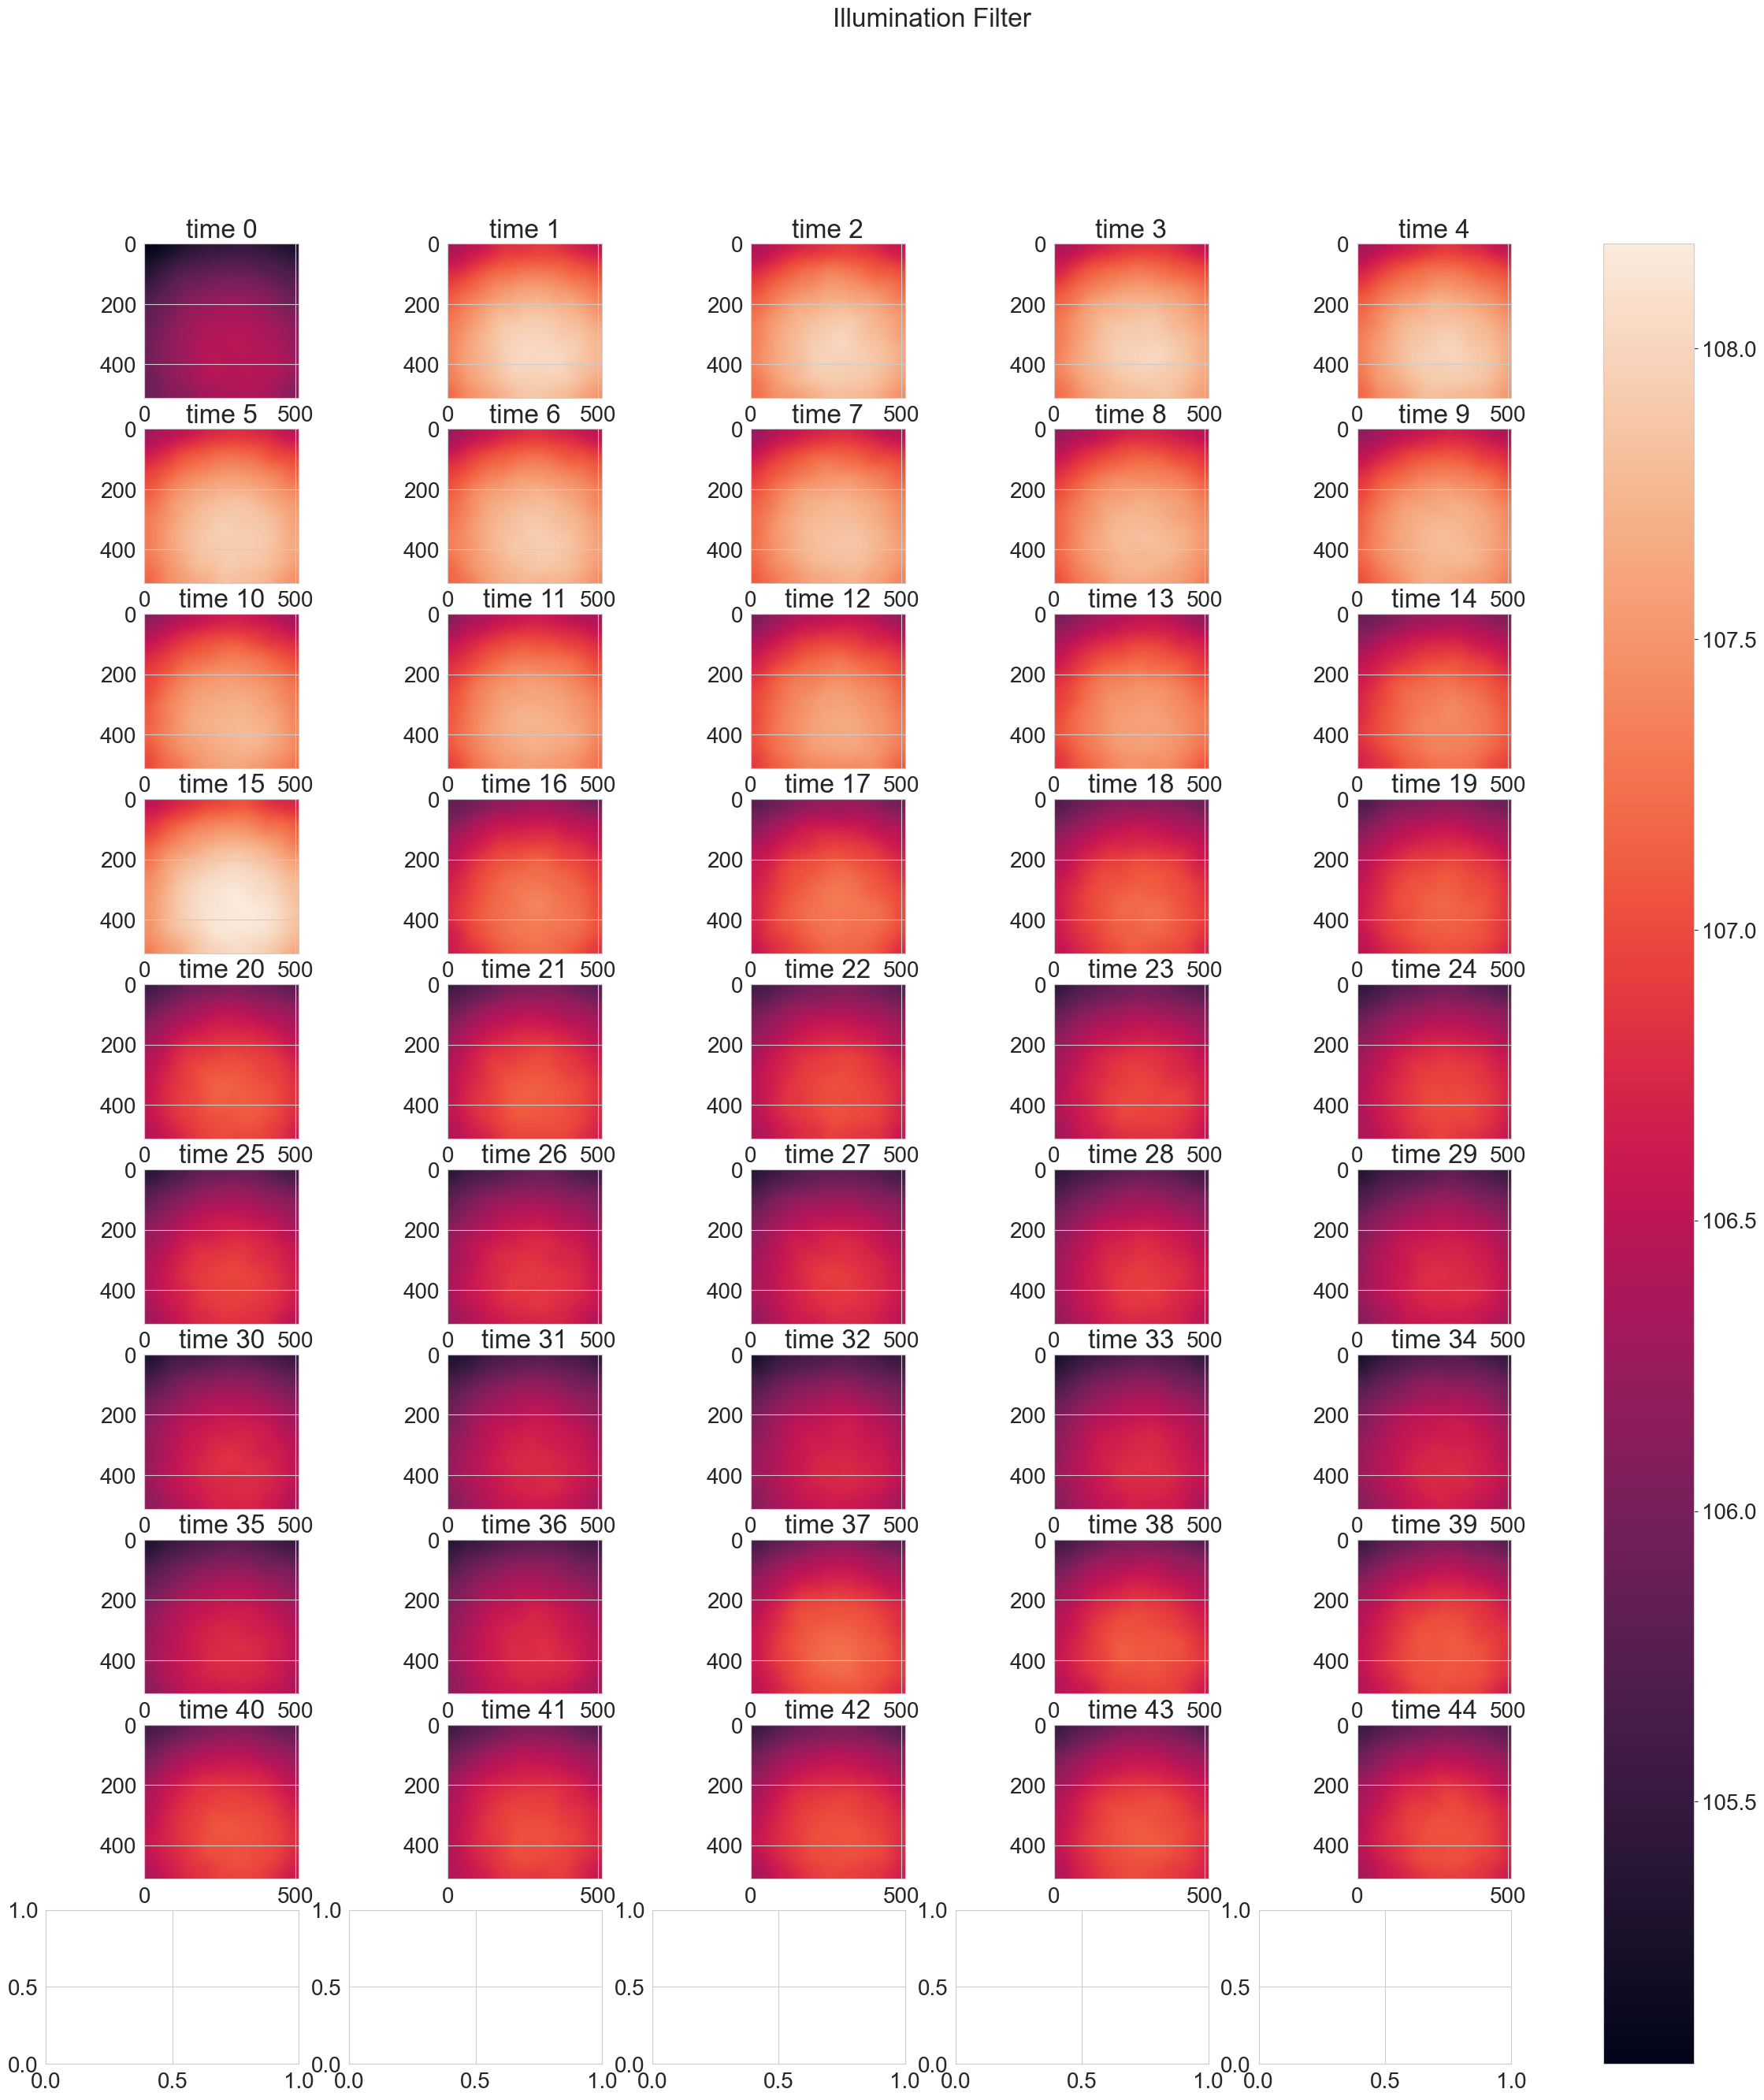

In [201]:
gu.show_imshow_sequence_with_colorbar(filters,time_points, 'Illumination Filter')



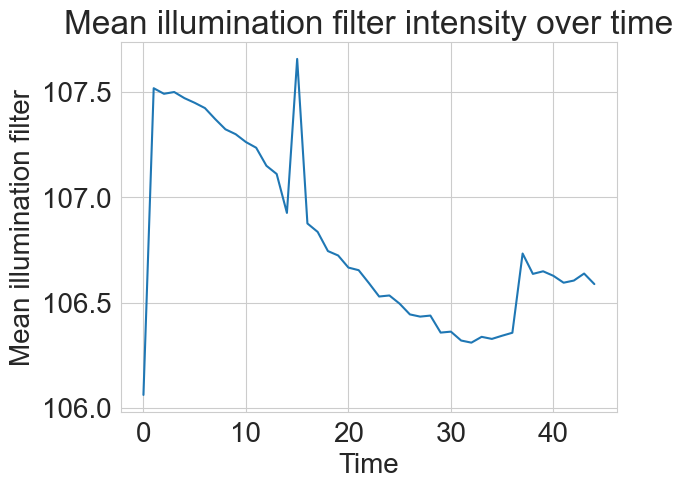

In [202]:
mean_illumination = np.mean(filters, axis = (1,2))
plt.plot(mean_illumination)
plt.title('Mean illumination filter intensity over time')
plt.xlabel('Time')

plt.ylabel('Mean illumination filter')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

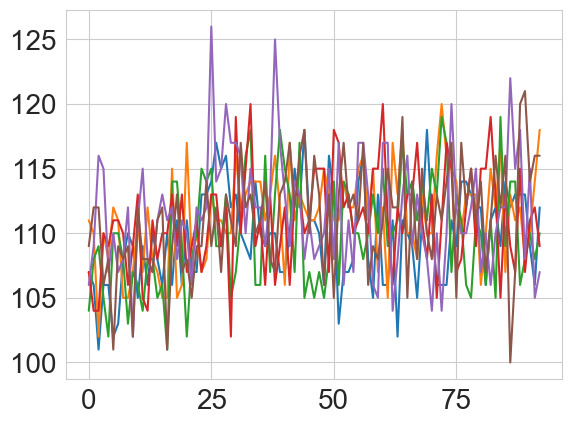

In [203]:
t = 15
x = 256
for y in range(0,512,100):
    plt.plot(c2[t,:,y,x])
plt.show

In [204]:


c2_corrected = pp.apply_illumination_filter(c2, min_z_filter, max_z_filter, illumination_sigma)
  

  0%|          | 0/45 [00:00<?, ?it/s]

In [205]:
np.save(MOVIE_PATH +'tmp/motors_corrected.npy', c2_corrected)

In [206]:
c2_corrected = np.load(MOVIE_PATH +'tmp/motors_corrected.npy')

In [207]:
importlib.reload(pp)

<module 'preprocessing.preprocessing_v2' from 'C:\\Users\\amityu\\DataspellProjects\\gel_sheets\\preprocessing\\preprocessing_v2.py'>

In [208]:
del c2_list,c2    

NameError: name 'c2_list' is not defined

In [209]:
data_after_illumination = c2_corrected[~np.isnan(c2_corrected)] 

In [210]:

hist, bins_edges = au.histogram_cupy(data_after_illumination, bins = np.linspace(0.5, 1, 100) )

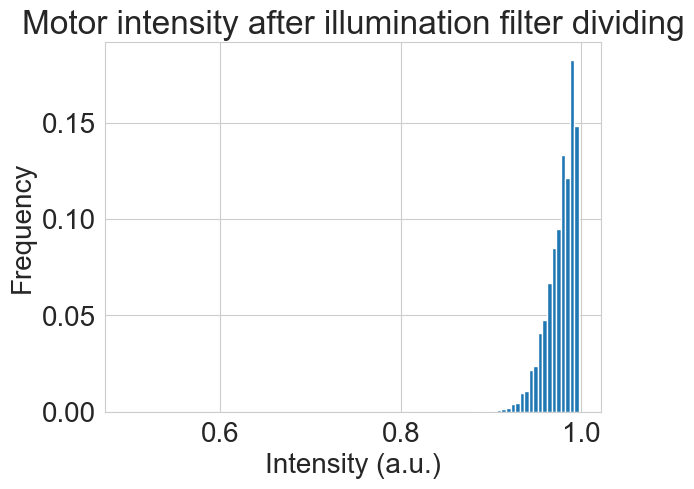

In [211]:
plt.bar(bins_edges[:-1], hist, width=bins_edges[1]- bins_edges[0])
plt.title('Motor intensity after illumination filter dividing')
image_name = 'Motor after_illumination_filter'
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Frequency')

plt.savefig(DATA_PATH + '{}/tmp/{}.png'.format(movie,image_name))
plt.show()

In [212]:
#shifting the values to zeros manually, if I took minimum function there will be noise that destrupt. I could also take from promil value
c2_corrected -= 0.88

In [213]:
data_after_illumination = c2_corrected[~np.isnan(c2_corrected)]

In [214]:

hist, bins_edges = au.histogram_cupy(data_after_illumination, bins=np.linspace(0, 0.5, 51))

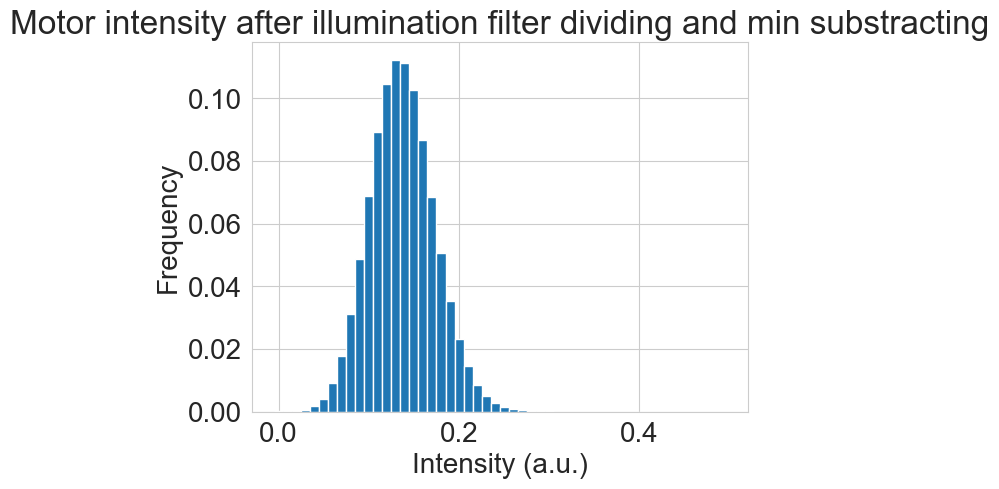

In [215]:
plt.bar(bins_edges[:-1], hist, width=bins_edges[1] - bins_edges[0])
plt.title('Motor intensity after illumination filter dividing and min substracting')
image_name = 'Motor after_illumination_filter'
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Frequency')

plt.savefig(DATA_PATH + '{}/tmp/{}.png'.format(movie, image_name))
plt.show()

In [216]:
del data_after_illumination

In [217]:
np.save(MOVIE_PATH + 'tmp/c2_corrected.npy', c2_corrected)

In [218]:
del c2_corrected

In [ ]:
c2_corrected = np.load(MOVIE_PATH + 'tmp/c2_corrected.npy')

In [5]:
z = pd.read_csv(MOVIE_PATH + 'np/membrane_fit.csv')['z'].to_numpy()

  0%|          | 0/45 [00:00<?, ?it/s]

C:\Users\amityu\AppData\Local\Temp\ipykernel_20220\3148602599.py:9: RuntimeWarning:

All-NaN slice encountered



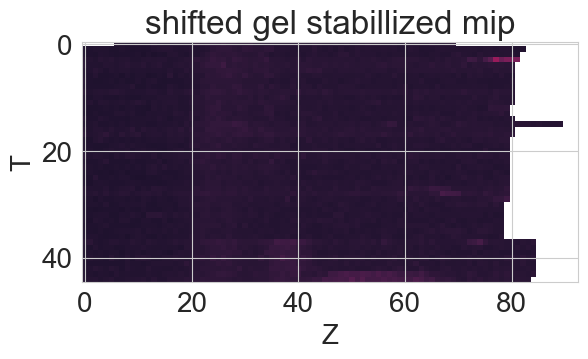

In [220]:

c2_norm_b = np.zeros(c2_corrected.shape, dtype=np.float32)
#z = pd.read_csv(MOVIE_PATH + 'np/membrane_fit.csv')['z'].to_numpy()
for t in trange(len(c2_corrected)):
    shift_val = [(z0 - z[t]), 0, 0]

    # shift your array
    c2_norm_b[t] = scipy.ndimage.shift(c2_corrected[t], shift_val, mode='constant', cval=np.nan, order=1)

mip = np.nanmax(c2_norm_b, axis=(2, 3))
plt.imshow(mip, vmin=0, vmax=3)
plt.title('shifted gel stabillized mip')
plt.xlabel('Z')
plt.ylabel('T')
plt.show()

In [221]:
np.save(MOVIE_PATH + 'tmp/c2_norm_before_trim.npy', c2_norm_b)


In [245]:
gel_norm_b = np.load(MOVIE_PATH + 'tmp/gel_norm_before_trim.npy')
c2_norm_b = np.load(MOVIE_PATH + 'tmp/c2_norm_before_trim.npy')


In [246]:
mip_c1 = np.nanmax(gel_norm_b, axis=(2, 3))
mip_c2 = np.nanmax(c2_norm_b, axis=(2, 3))

C:\Users\amityu\AppData\Local\Temp\ipykernel_20220\2766160415.py:1: RuntimeWarning:

All-NaN slice encountered

C:\Users\amityu\AppData\Local\Temp\ipykernel_20220\2766160415.py:2: RuntimeWarning:

All-NaN slice encountered



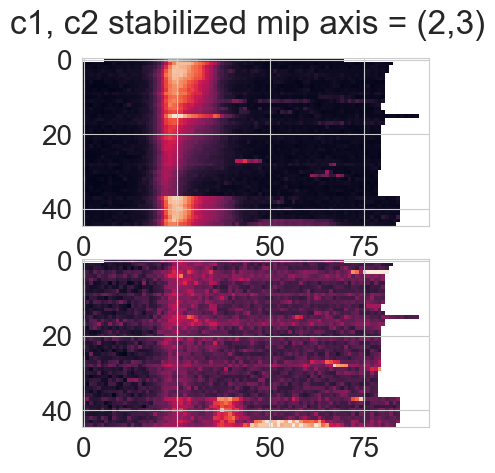

In [248]:
fig,(ax1,ax2) = plt.subplots(2,1)
ax1.imshow(mip_c1)
ax2.imshow(mip_c2, vmax=np.nanpercentile(mip_c2,99.7))
fig.suptitle('c1, c2 stabilized mip axis = (2,3)')
plt.show()


In [8]:
gel_norm_b = np.load(MOVIE_PATH + 'tmp/gel_norm_before_trim.npy')
c2_norm_b = np.load(MOVIE_PATH + 'tmp/gel_norm_before_trim.npy')

surface_b = np.load(MOVIE_PATH + 'tmp/height45_s3.npy')
membrane_b = np.load(MOVIE_PATH + 'tmp/membrane45_s3.npy')

### <span color = 'red'> check spike in seg_gui and update in ex_data spike_in and spike_out

In [9]:
# calculating holes in breakage
spike_b = pp.spike(surface_b)


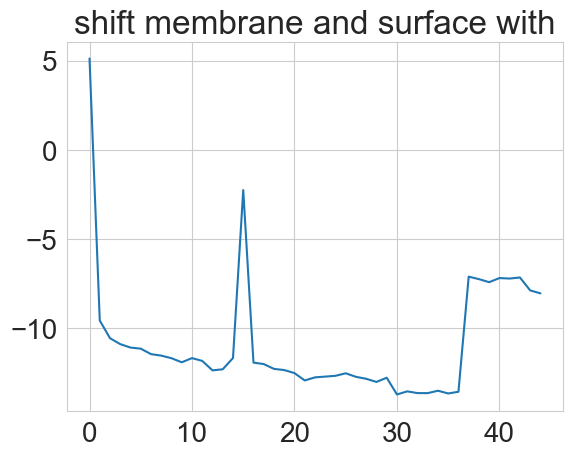

In [10]:
plt.plot(z0-z)
plt.title('shift membrane and surface with')
plt.show()

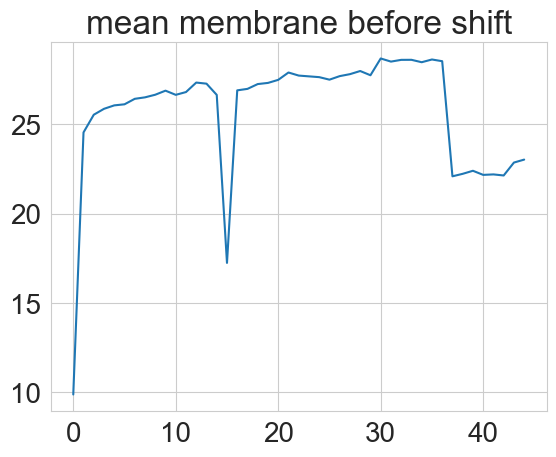

In [11]:
plt.plot(np.nanmean(membrane_b, axis=(1,2)))
plt.title('mean membrane before shift')
plt.show()

In [12]:
print('membrane mean should be {}'.format(z0))

membrane mean should be 15


In [13]:
membrane_b += z0  

In [14]:
z = z.reshape(-1,1,1)
z = np.tile(z, (1, membrane_b.shape[1], membrane_b.shape[2]))

In [15]:
membrane_b -= z

In [16]:
surface_b += z0
surface_b -= z

In [17]:
spike_b += z0
spike_b -= z

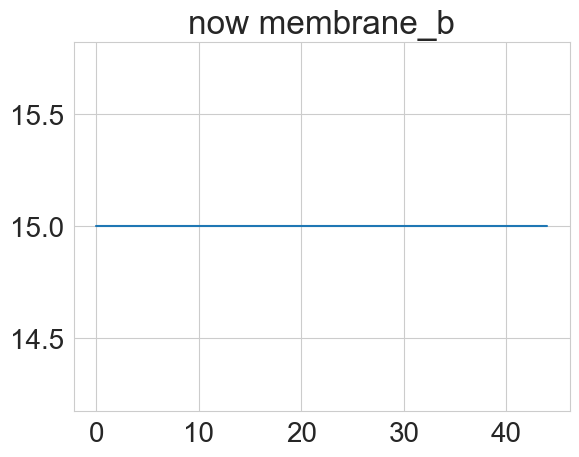

In [18]:
plt.plot(np.nanmean(membrane_b, axis=(1,2)))#.astype(int))
plt.title('now membrane_b')
plt.show()

In [19]:
np.save(MOVIE_PATH + 'np/spike.npy', spike_b)
np.save(MOVIE_PATH + 'np/height.npy', surface_b)
np.save(MOVIE_PATH + 'np/membrane.npy',membrane_b)
np.save(MOVIE_PATH + 'np/gel_norm.npy', gel_norm_b)
np.save(MOVIE_PATH + 'np/motors_norm.npy', c2_norm_b)
